<a href="https://colab.research.google.com/github/Vishal64B/Computer-Vision/blob/main/2347264_CV_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Demonstrate the following edge detection methods and interpret the results

i. First Order Derivative Methods.

ii. Second Order Derivative Methods.

iii. Optimum Edge Detection Method.

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

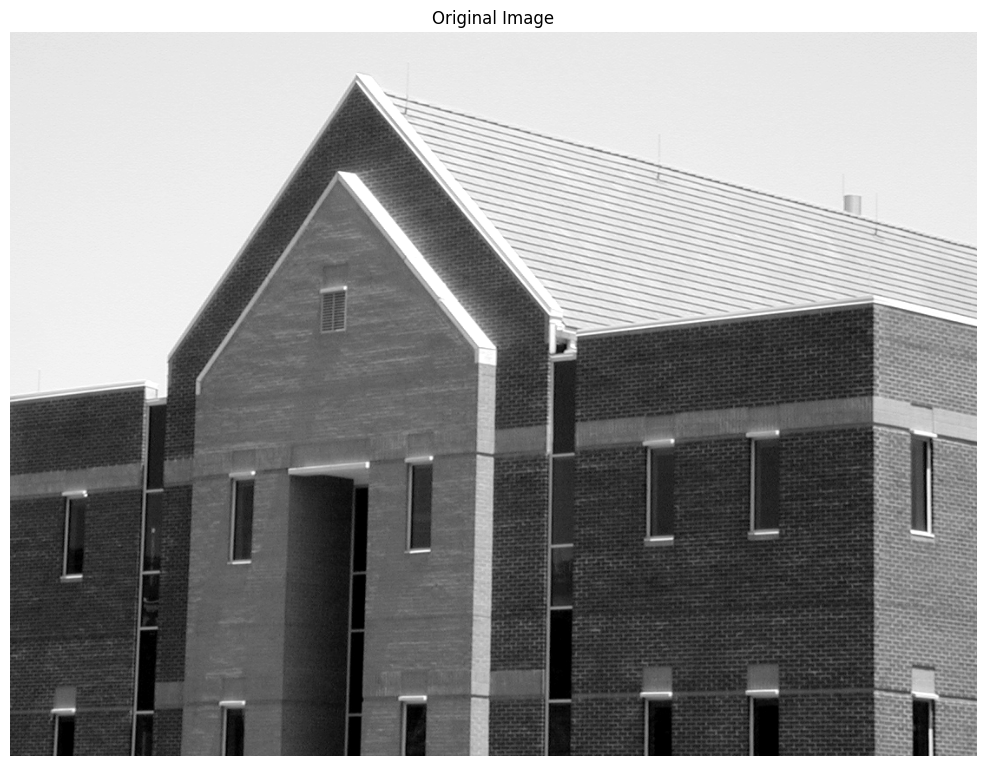

In [46]:
image = cv2.imread('image.tif', 0)

def show_images(titles, images, cmap='gray'):
    plt.figure(figsize=(12, 8))
    for i, (title, img) in enumerate(zip(titles, images)):
        plt.subplot(1, len(images), i+1)
        plt.title(title)
        plt.imshow(img, cmap=cmap)
        plt.tight_layout()
        plt.axis('off')
    plt.show()

show_images(["Original Image"], [image])

Step 1: First-Order Derivative Methods (Gradient-Based)
First-order derivative methods focus on finding the gradient of intensity in an image, highlighting the areas where intensity changes rapidly.

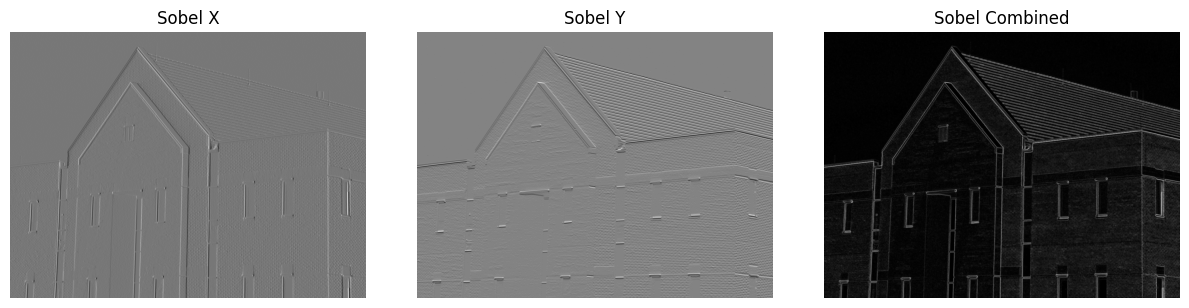


The Sobel operator is commonly used in applications where some degree of smoothing is required, as it helps reduce noise while detecting edges.
The Sobel operator produces thicker edges. It’s good for emphasizing edges.
Sobel X detects vertical edges, while Sobel Y detects horizontal ones. The combined output gives overall edges.



In [47]:
## Task 1: Finding first order derivative

## Using sobel operator

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Combining X and Y gradients
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

show_images(["Sobel X", "Sobel Y", "Sobel Combined"], [sobel_x, sobel_y, sobel_edges])

# Inference:

print('''
The Sobel operator is commonly used in applications where some degree of smoothing is required, as it helps reduce noise while detecting edges.
The Sobel operator produces thicker edges. It’s good for emphasizing edges.
Sobel X detects vertical edges, while Sobel Y detects horizontal ones. The combined output gives overall edges.
''')




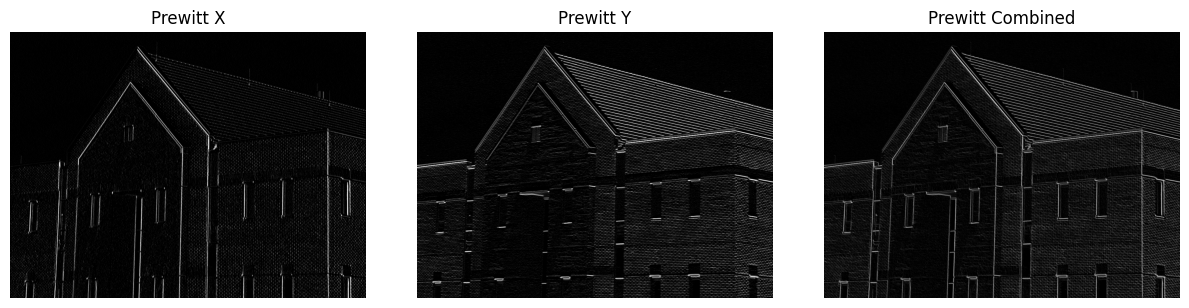


The Prewitt operator is well-suited for edge detection in less noisy environments and where computational simplicity is prioritized.
The Prewitt operator is simpler than Sobel and detects similar types of edges.
However, it’s generally noisier, making it less ideal for images with a lot of fine detail.



In [48]:
## Using Prewitt Edge Detection
prewitt_x = cv2.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))  # X direction
prewitt_y = cv2.filter2D(image, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))  # Y direction

# Combining X and Y gradients
prewitt_edges = cv2.magnitude(prewitt_x.astype(float), prewitt_y.astype(float))

show_images(["Prewitt X", "Prewitt Y", "Prewitt Combined"], [prewitt_x, prewitt_y, prewitt_edges])

# Inference:
print('''
The Prewitt operator is well-suited for edge detection in less noisy environments and where computational simplicity is prioritized.
The Prewitt operator is simpler than Sobel and detects similar types of edges.
However, it’s generally noisier, making it less ideal for images with a lot of fine detail.
''')



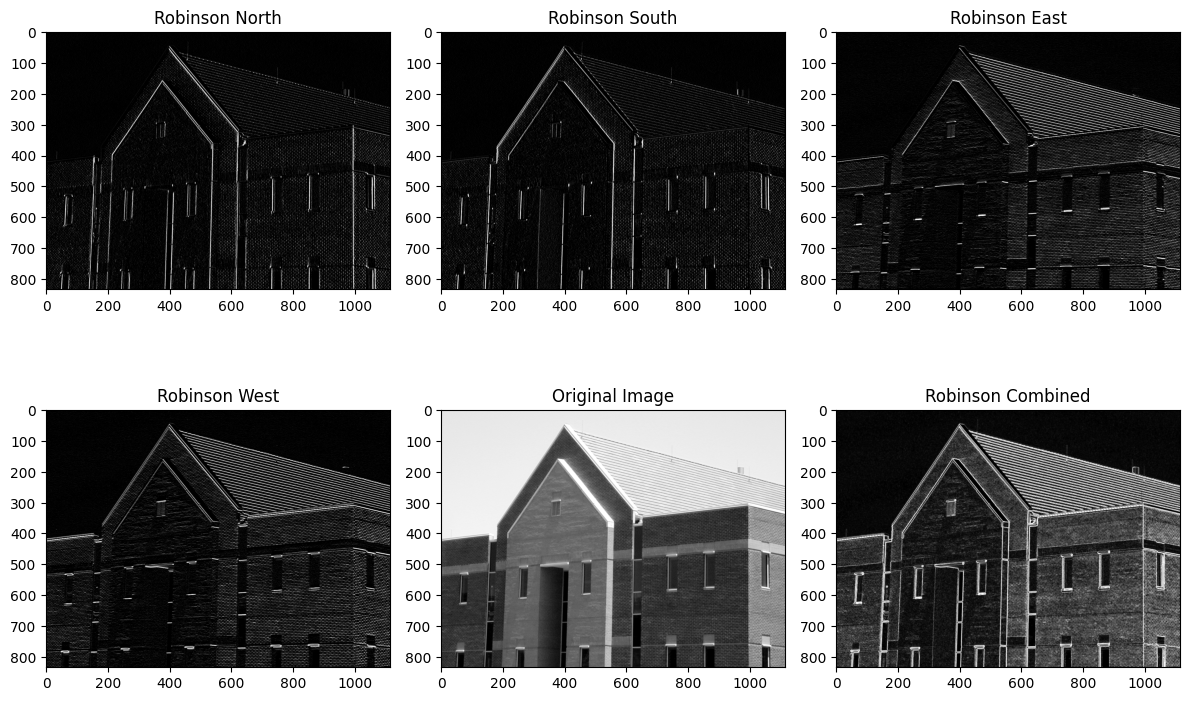


The Robinson operator can detect edges in multiple orientations.
This approach highlights edges more uniformly in multiple directions, which can be useful for certain applications.



In [49]:
# Using Robinson Compass Operator

# Defining Robinson Compass Kernels
robinson_kernels = {
    'north': np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    'south': np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]),
    'east': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    'west': np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
}

# response arrays
responses = {}
combined_response = np.zeros_like(image, dtype=float)

# Applying each directional kernel and storing the results
for direction, kernel in robinson_kernels.items():
    filtered_image = cv2.filter2D(image, -1, kernel)
    responses[direction] = filtered_image.astype(float)
    combined_response = np.maximum(combined_response, filtered_image.astype(float))

# Plot all directions and the combined result
plt.figure(figsize=(12, 8))

# Subplot for North
plt.subplot(2, 3, 1)
plt.imshow(responses['north'], cmap='gray')
plt.title('Robinson North')

# Subplot for South
plt.subplot(2, 3, 2)
plt.imshow(responses['south'], cmap='gray')
plt.title('Robinson South')

# Subplot for East
plt.subplot(2, 3, 3)
plt.imshow(responses['east'], cmap='gray')
plt.title('Robinson East')

# Subplot for West
plt.subplot(2, 3, 4)
plt.imshow(responses['west'], cmap='gray')
plt.title('Robinson West')

# Subplot for the original image
plt.subplot(2, 3, 5)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Subplot for the combined result
plt.subplot(2, 3, 6)
plt.imshow(combined_response, cmap='gray')
plt.title('Robinson Combined')

plt.tight_layout()
plt.show()


# Inference:
print('''
The Robinson operator can detect edges in multiple orientations.
This approach highlights edges more uniformly in multiple directions, which can be useful for certain applications.
''')


In [50]:
print('''
Comparison: Sobel, Prewitt, and Robinson
Sobel Operator: Offers a balance between edge detection and noise suppression due to its weighted smoothing effect.
Prewitt Operator: A simpler alternative to Sobel, faster to compute but more sensitive to noise.
Robinson Operator: Effective at detecting edges in multiple directions, ideal for orientation-specific edge detection.
''')


Comparison: Sobel, Prewitt, and Robinson
Sobel Operator: Offers a balance between edge detection and noise suppression due to its weighted smoothing effect.
Prewitt Operator: A simpler alternative to Sobel, faster to compute but more sensitive to noise.
Robinson Operator: Effective at detecting edges in multiple directions, ideal for orientation-specific edge detection.




Second-order derivative methods detect edges by calculating the rate of change of the gradient, focusing more on where
changes increase or decrease.



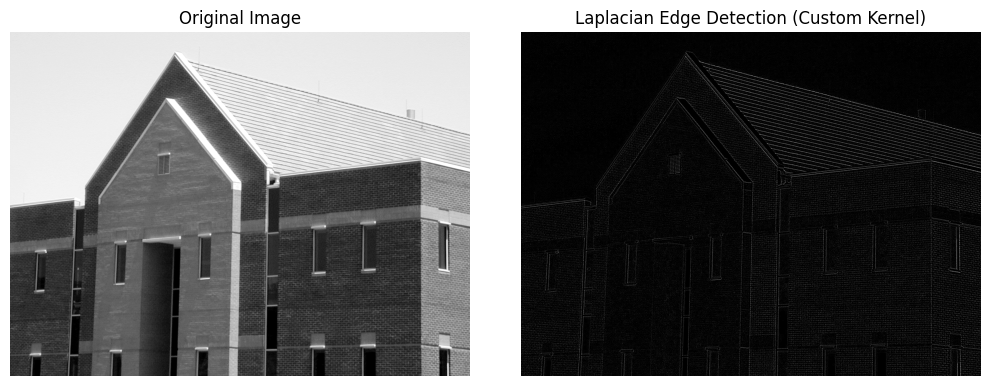


---------------------------------------------------------------------------------------------------------------



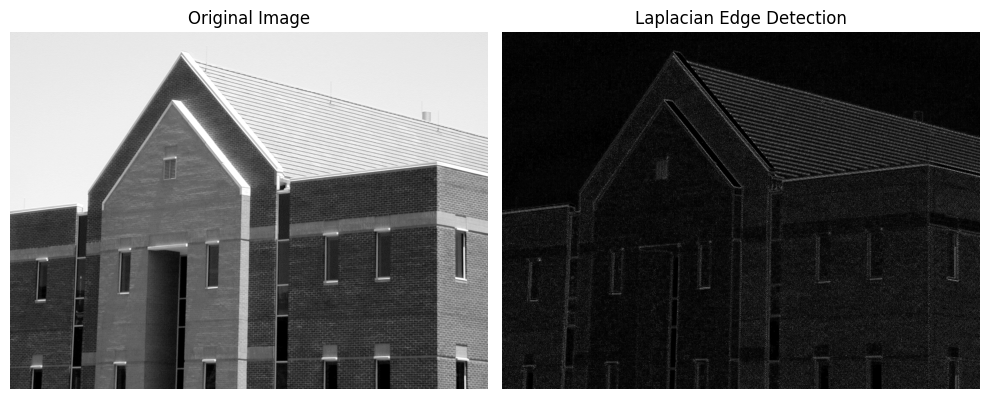


The Laplacian operator detects edges by finding areas of rapid intensity change.
However, it can be sensitive to noise and often produces more spurious edges than first-order methods.



In [52]:
# Task 2: Second Order Derivative Methods.

print('''
Second-order derivative methods detect edges by calculating the rate of change of the gradient, focusing more on where
changes increase or decrease.
''')

# Defining the Laplacian kernel (using kernal manually)
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

# Apply the kernel using filter2D
laplacian = cv2.filter2D(image, -1, laplacian_kernel)

# Display the original and edge-detected images
plt.figure(figsize=(10, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.tight_layout()
plt.axis('off')

# Laplacian edge-detected image (using custom kernel)
plt.subplot(1, 2, 2)
plt.imshow(np.abs(laplacian), cmap='gray')  # Take absolute value for visualization
plt.title('Laplacian Edge Detection (Custom Kernel)')
plt.tight_layout()
plt.axis('off')

plt.show()

print('''\n---------------------------------------------------------------------------------------------------------------\n''')

# Applying the Laplacian operator(using inbuilt function)
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Display the original and edge-detected images
plt.figure(figsize=(10, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.tight_layout()
plt.axis('off')

# Laplacian edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(np.abs(laplacian), cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')
plt.tight_layout()
plt.show()

# Inference:
print('''
The Laplacian operator detects edges by finding areas of rapid intensity change.
However, it can be sensitive to noise and often produces more spurious edges than first-order methods.
''')



The Marr-Hildreth edge detector combines the Laplacian operator with Gaussian smoothing to handle noise. 
This is also known as the Laplacian of Gaussian (LoG) method. It first applies a Gaussian blur to the image to smooth 
out high-frequency noise, then applies the Laplacian operator.



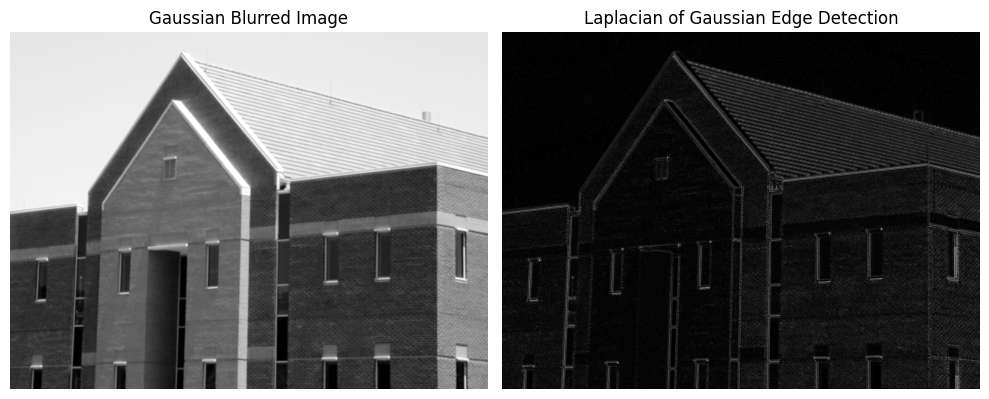


The Marr-Hildreth operator effectively suppresses noise by applying a Gaussian filter before detecting edges.
This results in smoother, more continuous edges but can sometimes overlook fine details.



In [58]:
# Method 2: using Marr-Hildreth Edge Detector (Laplacian of Gaussian)
print('''
The Marr-Hildreth edge detector combines the Laplacian operator with Gaussian smoothing to handle noise.
This is also known as the Laplacian of Gaussian (LoG) method. It first applies a Gaussian blur to the image to smooth
out high-frequency noise, then applies the Laplacian operator.
''')

# Applying Gaussian smoothing first
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Laplacian of Gaussian
marr_hildreth_edges = cv2.Laplacian(blurred_image, cv2.CV_64F)


plt.figure(figsize=(10, 6))

# Blurred image
plt.subplot(1, 2, 1)
plt.imshow(blurred_image, cmap='gray')
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.tight_layout()

# Laplacian of Gaussian result
plt.subplot(1, 2, 2)
plt.imshow(np.abs(marr_hildreth_edges), cmap='gray')
plt.title('Laplacian of Gaussian Edge Detection')
plt.axis('off')
plt.tight_layout()


plt.show()

# Inference:

print('''
The Marr-Hildreth operator effectively suppresses noise by applying a Gaussian filter before detecting edges.
This results in smoother, more continuous edges but can sometimes overlook fine details.
''')




The Canny Edge Detector is an optimal edge detection method that involves multiple stages for accurate edge detection. 
It first applies Gaussian smoothing to reduce noise, calculates the gradient to detect edge direction, and then uses 
double thresholding and edge tracking by hysteresis to filter out weak edges, preserving only strong, continuous edges.



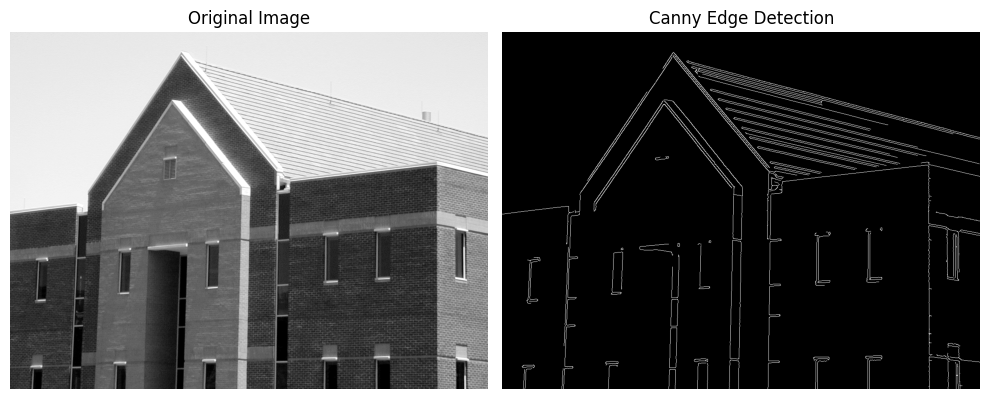


The Canny Edge Detector provides a clean and accurate edge map by combining gradient calculation with double thresholding and hysteresis. 
The Gaussian blur helps suppress noise, while the thresholds ensure only strong edges are highlighted. This method is ideal for applications 
where precise and continuous edges are required.



In [63]:
# Task 3: Optimum Edge Detection

print('''
The Canny Edge Detector is an optimal edge detection method that involves multiple stages for accurate edge detection.
It first applies Gaussian smoothing to reduce noise, calculates the gradient to detect edge direction, and then uses
double thresholding and edge tracking by hysteresis to filter out weak edges, preserving only strong, continuous edges.
''')

# Applying Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 1.5)

# Applying Canny edge detector
edges = cv2.Canny(blurred, threshold1=100, threshold2=200)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.tight_layout()

plt.show()

# Inference

print('''
The Canny Edge Detector provides a clean and accurate edge map by combining gradient calculation with double thresholding and hysteresis.
The Gaussian blur helps suppress noise, while the thresholds ensure only strong edges are highlighted. This method is ideal for applications
where precise and continuous edges are required.
''')
